In [1]:
#1.Importing
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from time_series_helper import WindowGenerator



mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [2]:
#2.Data Loading
csv_path = os.path.join(os.getcwd(),'cases_malaysia_covid.csv')
df = pd.read_csv(csv_path)

In [3]:
#3. Data Inspection
print("Shape of the date =", df.shape)
print("\nInfo about the dataframe =\n", df.info())
print("\nDesc of the dataframe =\n", df.describe().transpose())
print("\nExample data =\n", df.head(1))

Shape of the date = (780, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     780 non-null    object 
 1   cases_new                779 non-null    object 
 2   cases_import             780 non-null    int64  
 3   cases_recovered          780 non-null    int64  
 4   cases_active             780 non-null    int64  
 5   cases_cluster            780 non-null    int64  
 6   cases_unvax              780 non-null    int64  
 7   cases_pvax               780 non-null    int64  
 8   cases_fvax               780 non-null    int64  
 9   cases_boost              780 non-null    int64  
 10  cases_child              780 non-null    int64  
 11  cases_adolescent         780 non-null    int64  
 12  cases_adult              780 non-null    int64  
 13  cases_elderly            780 non-null    int64  
 

In [4]:
#4. Data Cleaning
print(df.isna().sum())
print(df.duplicated().sum())

# Convert the 'date' column to a datetime format
df['date'] = pd.to_datetime(df['date'])

# Covert cases_new to numeric
df['cases_new'] = pd.to_numeric(df['cases_new'], errors='coerce')

date                         0
cases_new                    1
cases_import                 0
cases_recovered              0
cases_active                 0
cases_cluster                0
cases_unvax                  0
cases_pvax                   0
cases_fvax                   0
cases_boost                  0
cases_child                  0
cases_adolescent             0
cases_adult                  0
cases_elderly                0
cases_0_4                    0
cases_5_11                   0
cases_12_17                  0
cases_18_29                  0
cases_30_39                  0
cases_40_49                  0
cases_50_59                  0
cases_60_69                  0
cases_70_79                  0
cases_80                     0
cluster_import             342
cluster_religious          342
cluster_community          342
cluster_highRisk           342
cluster_education          342
cluster_detentionCentre    342
cluster_workplace          342
dtype: int64
0


<ipython-input-4-9bd75be5bab7>:7: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'])


In [5]:
columns_needed= ['date','cases_new', 'cases_import', 'cases_recovered', 'cases_active']
df = df[columns_needed]

In [6]:
# Dealing with missing values
#filter out missing values
df[df.isnull().any(axis=1)]

,date,cases_new,cases_import,cases_recovered,cases_active
98,2020-05-02,NaN,11,116,1747
217,2020-08-29,NaN,10,8,153
273,2020-10-24,NaN,11,671,8953
279,2020-10-30,NaN,0,491,10380
287,2020-11-07,NaN,0,1029,11646
427,2021-03-27,NaN,5,1257,14127
445,2021-04-14,NaN,6,1485,16625
446,2021-04-15,NaN,19,1259,17510
476,2021-05-15,NaN,9,3432,41914
587,2021-09-03,NaN,14,22399,254719


In [7]:
#drop row with null values
df = df.dropna()

# Print the updated DataFrame
print(df)

          date  cases_new  cases_import  cases_recovered  cases_active
0   2020-01-25        4.0             4                0             4
1   2020-01-26        0.0             0                0             4
2   2020-01-27        0.0             0                0             4
3   2020-01-28        0.0             0                0             4
4   2020-01-29        3.0             3                0             7
..         ...        ...           ...              ...           ...
775 2022-03-10    30787.0           608            26457        314211
776 2022-03-11    32800.0           541            24444        322507
777 2022-03-12    26250.0           545            25089        323618
778 2022-03-13    22535.0           361            25356        320785
779 2022-03-14    22030.0           394            33872        308943

[767 rows x 5 columns]


In [8]:
#5. Feature Engineering
# Adding lag features to your dataset
def add_lag_features(df, lag_steps):
    for i in range(1, lag_steps + 1):
        df[f'lag_{i}'] = df['cases_new'].shift(i)
    return df.dropna()

lag_steps = 30  # Experiment with different lag values
df = add_lag_features(df, lag_steps)

In [9]:
# Remove the date column from the dataframe and paste it in a seperate variable
date_time = pd.to_datetime(df.pop('date'))

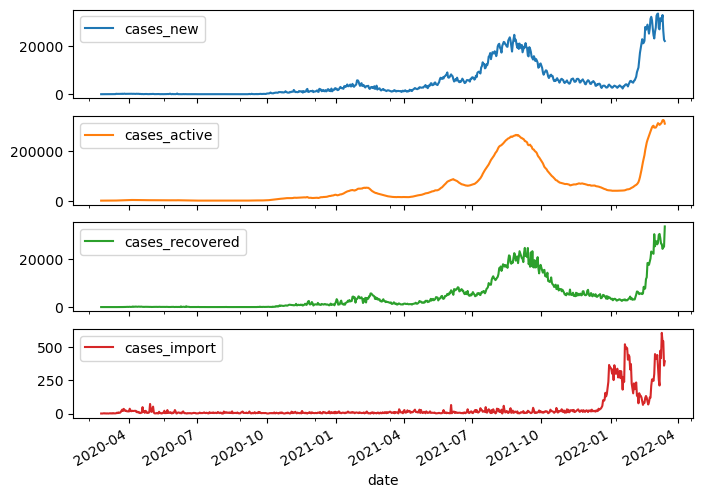

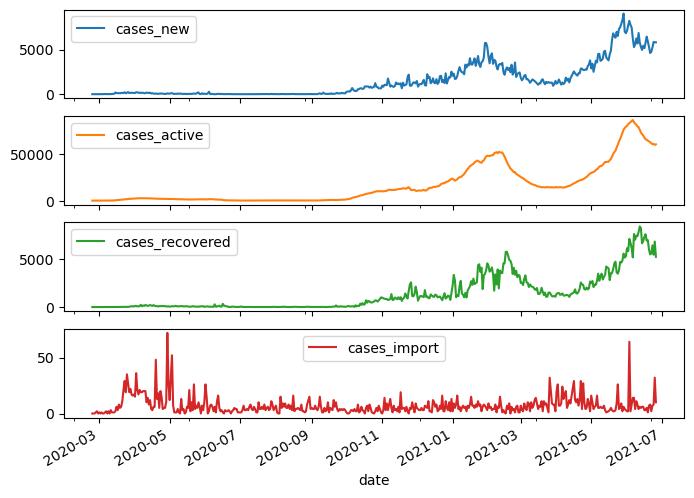

In [10]:
#plotting graphs to inspect any trends
plot_cols = ['cases_new', 'cases_active', 'cases_recovered', 'cases_import']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

# Plotting the first 480 rows of data
plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

In [11]:
#Inspect some basic stat from the dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cases_new,737.0,5142.712347,7207.538888,0.0,118.0,2451.0,5854.0,33406.0
cases_import,737.0,38.278155,93.378743,0.0,4.0,7.0,18.0,608.0
cases_recovered,737.0,4674.530529,6539.765149,0.0,87.0,2276.0,5579.0,33872.0
cases_active,737.0,57568.947083,78765.311375,1.0,1758.0,25319.0,66993.0,323618.0
lag_1,737.0,5112.820896,7183.048289,0.0,117.0,2437.0,5841.0,33406.0
lag_2,737.0,5082.244233,7156.700080,0.0,115.0,2433.0,5828.0,33406.0
lag_3,737.0,5046.626866,7116.416494,0.0,110.0,2364.0,5812.0,33406.0
lag_4,737.0,5002.122117,7044.818611,0.0,110.0,2342.0,5809.0,33406.0
lag_5,737.0,4960.348711,6982.719801,0.0,110.0,2341.0,5806.0,33406.0
lag_6,737.0,4919.309362,6922.529796,0.0,109.0,2340.0,5803.0,33406.0


In [12]:
#6. Data splitting
#Note: We don't want to shuffle the data when splitting to ensure the data is still in correct order based on time steps

column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [13]:
#7. Data normalization
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

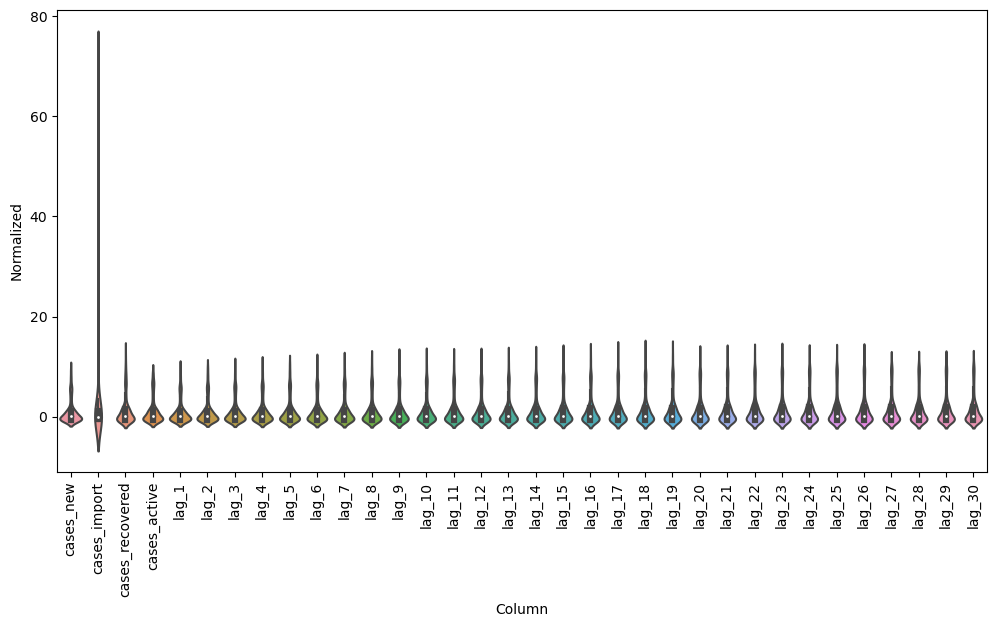

In [14]:
#8.Inspect dist of the features after normalization
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [15]:
w1 = WindowGenerator(input_width=30, label_width=30,shift=1, train_df=train_df, val_df=val_df, test_df=test_df, label_columns=['cases_new'])

w2 = WindowGenerator(input_width=30, label_width=30,shift=30,train_df=train_df, val_df=val_df, test_df=test_df, label_columns=['cases_new'])

In [16]:
#Stack three slices, the length of the total window for w1 and w2.
example_window_w1 = tf.stack([np.array(train_df[:w1.total_window_size]),
                             np.array(train_df[100:100+w1.total_window_size]),
                             np.array(train_df[200:200+w1.total_window_size])])

example_window_w2 = tf.stack([np.array(train_df[:w2.total_window_size]),
                             np.array(train_df[100:100+w2.total_window_size]),
                             np.array(train_df[200:200+w2.total_window_size])])

example_inputs_w1, example_labels_w1 = w1.split_window(example_window_w1)
example_inputs_w2, example_labels_w2 = w2.split_window(example_window_w2)

print('All shapes are: (batch, time, features)')
print(f'Window shape w1: {example_window_w1.shape}')
print(f'Inputs shape w1: {example_inputs_w1.shape}')
print(f'Labels shape w1: {example_labels_w1.shape}')
print(f'Window shape w2: {example_window_w2.shape}')
print(f'Inputs shape w2: {example_inputs_w2.shape}')
print(f'Labels shape w2: {example_labels_w2.shape}')

All shapes are: (batch, time, features)
Window shape w1: (3, 31, 34)
Inputs shape w1: (3, 30, 34)
Labels shape w1: (3, 30, 1)
Window shape w2: (3, 60, 34)
Inputs shape w2: (3, 30, 34)
Labels shape w2: (3, 30, 1)


(TensorSpec(shape=(None, 30, 34), dtype=tf.float32, name=None), TensorSpec(shape=(None, 30, 1), dtype=tf.float32, name=None))
(TensorSpec(shape=(None, 30, 34), dtype=tf.float32, name=None), TensorSpec(shape=(None, 30, 1), dtype=tf.float32, name=None))


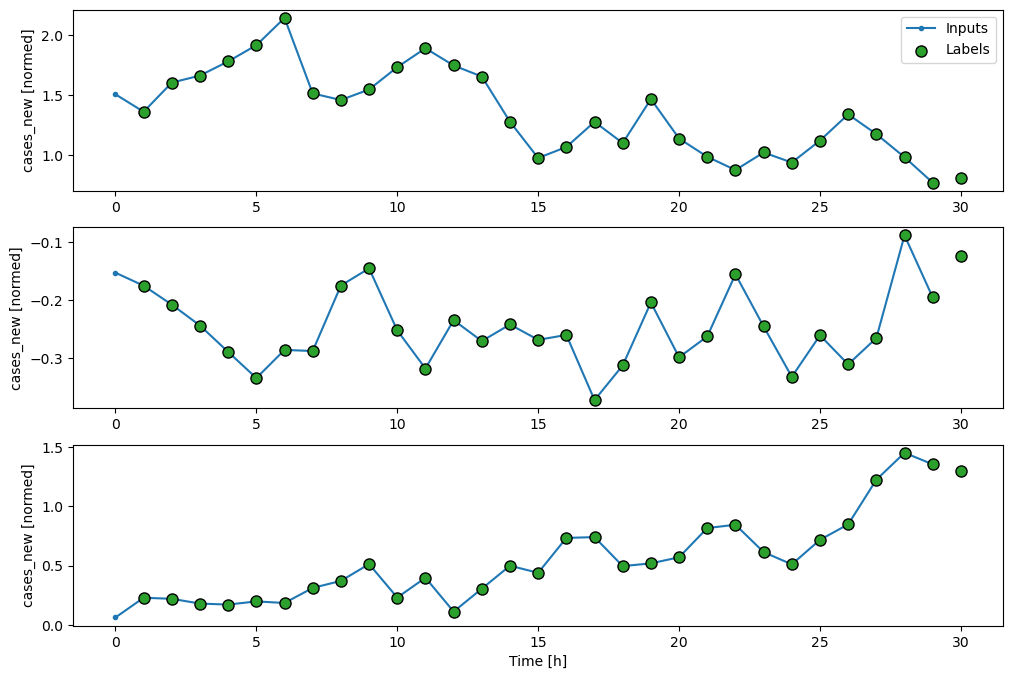

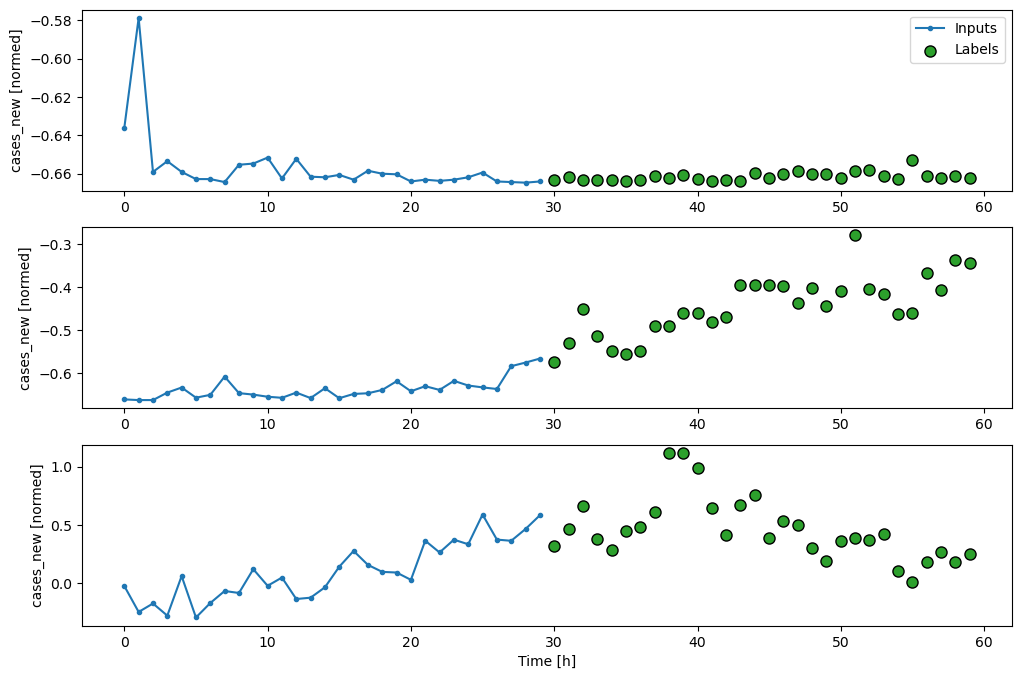

In [17]:
# Plot both w1 and w2
w1.plot(plot_col='cases_new')
w2.plot(plot_col='cases_new')

# Each element is an (inputs, label) pair for both w1 and w2.
print(w1.train.element_spec)
print(w2.train.element_spec)

In [18]:
#9. Model developmennt
#Create the data window
wide_window = WindowGenerator(
    input_width=30, label_width=30, shift=1,train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['cases_new'])

wide_window

Total window size: 31
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
Label column name(s): ['cases_new']

In [19]:
#single-step LSTM model
#predict only a single future point
from tensorflow import keras
from tensorflow.keras import callbacks
from tensorflow.keras.regularizers import l2

l2_strength = 0.005  # Adjust this value to control the strength of L2 regularization

# Increase model complexity
lstm_model = tf.keras.Sequential()
lstm_model.add(tf.keras.layers.LSTM(128, activation='relu', return_sequences=True, kernel_regularizer=l2(l2_strength)))
lstm_model.add(tf.keras.layers.Dropout(0.5))
lstm_model.add(tf.keras.layers.LSTM(64, activation='relu', return_sequences=True, kernel_regularizer=l2(l2_strength)))
lstm_model.add(tf.keras.layers.Dropout(0.5))
lstm_model.add(tf.keras.layers.Dense(1, activation='linear'))

MAX_EPOCHS = 100  # Increase the number of training epochs

def compile_and_fit(model, window, patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

    model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=[tf.keras.metrics.MeanAbsoluteError(), tf.keras.metrics.MeanAbsolutePercentageError()])

    # Create TensorBoard callback
    base_log_path = r"tensorboard_logs\covid_model"
    log_path = os.path.join(base_log_path, datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    tb = callbacks.TensorBoard(log_path)

    history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping, tb])
    return history

history = compile_and_fit(lstm_model, wide_window, patience=15)

Epoch 1/100
16/16 [==============================] - 7s 128ms/step - loss: 1.2984 - mean_absolute_error: 0.3253 - mean_absolute_percentage_error: 91.4524 - val_loss: 77.1924 - val_mean_absolute_error: 4.7853 - val_mean_absolute_percentage_error: 181.5282
Epoch 2/100
16/16 [==============================] - 1s 75ms/step - loss: 0.9787 - mean_absolute_error: 0.2569 - mean_absolute_percentage_error: 94.6313 - val_loss: 14.9607 - val_mean_absolute_error: 2.2778 - val_mean_absolute_percentage_error: 94.2750
Epoch 3/100
16/16 [==============================] - 1s 75ms/step - loss: 0.7634 - mean_absolute_error: 0.2193 - mean_absolute_percentage_error: 75.2573 - val_loss: 8.2191 - val_mean_absolute_error: 1.8271 - val_mean_absolute_percentage_error: 83.2591
Epoch 4/100
16/16 [==============================] - 1s 75ms/step - loss: 0.6107 - mean_absolute_error: 0.2026 - mean_absolute_percentage_error: 69.6808 - val_loss: 14.5943 - val_mean_absolute_error: 2.5797 - val_mean_absolute_percentage_er

52.491695404052734


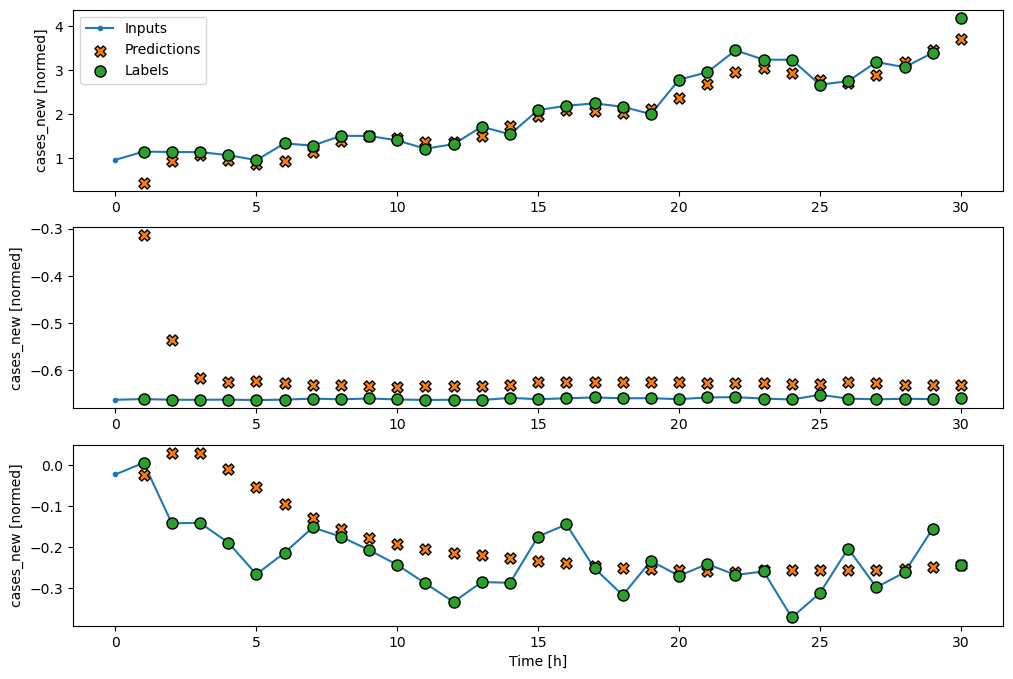

In [20]:
wide_window.plot(plot_col='cases_new', model=lstm_model)

#MAPE
mape = history.history['mean_absolute_percentage_error']
final_mape = mape[-1]
print(final_mape)

In [21]:
#multi-output for single step model
wide_window = WindowGenerator(input_width=30, label_width=30, shift=1, train_df=train_df, val_df=val_df, test_df=test_df)

for example_inputs, example_labels in wide_window.train.take(1):
    print(f'Inputs shape (batch, time, feature):{example_inputs.shape}')
    print(f'Labels shape (batch, time, feature):{example_labels.shape}')

Inputs shape (batch, time, feature):(32, 30, 34)
Labels shape (batch, time, feature):(32, 30, 34)


In [22]:
# to have multiple output, the # nodes inside output layer = the # columns u have for your labels
lstm_model_2 = keras.Sequential()
lstm_model_2.add(keras.layers.LSTM(128, return_sequences=True))
lstm_model_2.add(keras.layers.Dense(example_labels.shape[-1]))

history = compile_and_fit(lstm_model_2, wide_window, patience=15)

Epoch 1/100
16/16 [==============================] - 5s 102ms/step - loss: 0.3760 - mean_absolute_error: 0.4082 - mean_absolute_percentage_error: 186.2220 - val_loss: 15.9832 - val_mean_absolute_error: 2.9378 - val_mean_absolute_percentage_error: 54.9248
Epoch 2/100
16/16 [==============================] - 1s 46ms/step - loss: 0.1152 - mean_absolute_error: 0.2065 - mean_absolute_percentage_error: 224.8840 - val_loss: 12.2162 - val_mean_absolute_error: 2.5118 - val_mean_absolute_percentage_error: 47.3872
Epoch 3/100
16/16 [==============================] - 1s 45ms/step - loss: 0.0737 - mean_absolute_error: 0.1525 - mean_absolute_percentage_error: 167.1159 - val_loss: 10.8951 - val_mean_absolute_error: 2.3594 - val_mean_absolute_percentage_error: 46.6960
Epoch 4/100
16/16 [==============================] - 1s 46ms/step - loss: 0.0608 - mean_absolute_error: 0.1322 - mean_absolute_percentage_error: 141.1465 - val_loss: 10.0606 - val_mean_absolute_error: 2.2669 - val_mean_absolute_percentag

104.22650909423828


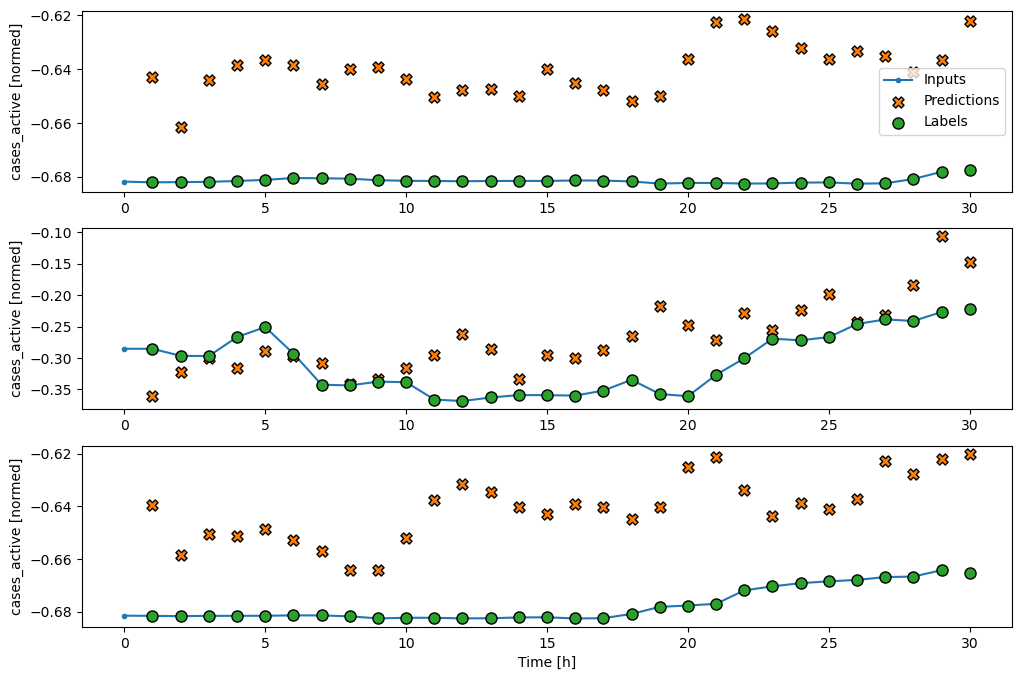

In [23]:
#applying the single step model to another column
wide_window.plot(plot_col='cases_active', model=lstm_model_2)

mape = history.history['mean_absolute_percentage_error']
final_mape = mape[-1]
print(final_mape)

Inputs shape (batch, time, feature):(32, 30, 34)
Labels shape (batch, time, feature):(32, 30, 34)


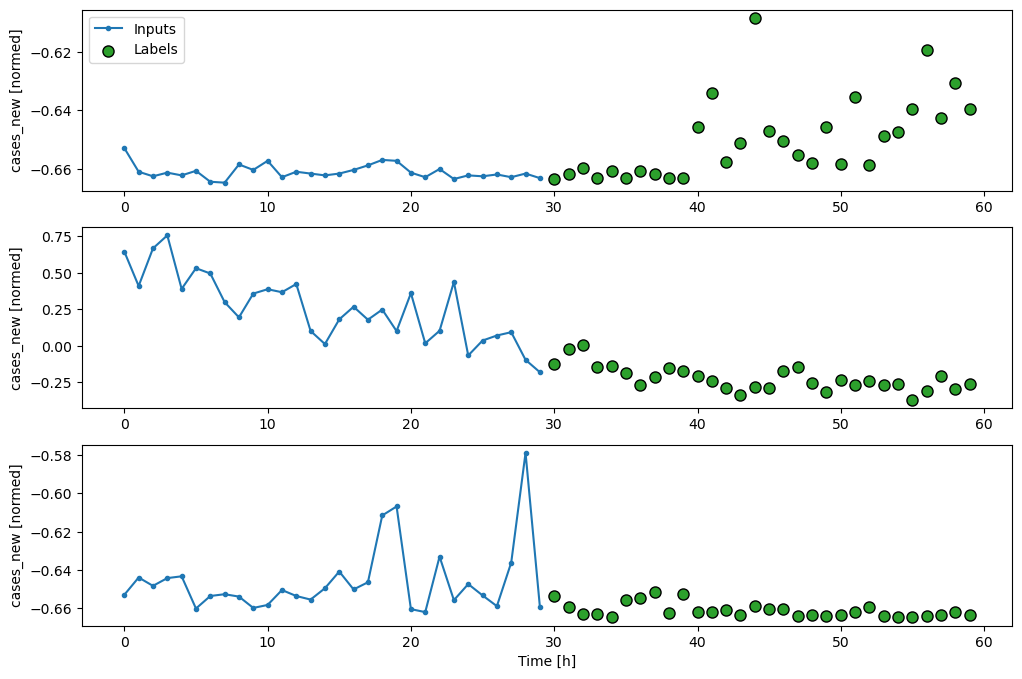

In [24]:
#multi-step model
#the model needs to learn to predict a range of future value
#predict a sequence of the future values

#a single shot predictions (entire time-series is predicted at once)
#create multi-step window
OUT_WINDOW = 30
multi_window = WindowGenerator(input_width=30, label_width=OUT_WINDOW, shift=OUT_WINDOW,train_df=train_df, val_df=val_df, test_df=test_df)
multi_window.plot(plot_col='cases_new')
multi_window
for example_inputs, example_labels in multi_window.train.take(1):
    print(f'Inputs shape (batch, time, feature):{example_inputs.shape}')
    print(f'Labels shape (batch, time, feature):{example_labels.shape}')

In [25]:
multi_lstm = keras.Sequential()
multi_lstm.add(keras.layers.LSTM(32, return_sequences=False))
multi_lstm.add(keras.layers.Dense(OUT_WINDOW*example_labels.shape[-1]))
multi_lstm.add(keras.layers.Reshape([OUT_WINDOW,example_labels.shape[-1]]))

Epoch 1/100
15/15 [==============================] - 4s 77ms/step - loss: 0.7259 - mean_absolute_error: 0.6497 - mean_absolute_percentage_error: 120.6395 - val_loss: 17.8123 - val_mean_absolute_error: 3.2584 - val_mean_absolute_percentage_error: 90.4379
Epoch 2/100
15/15 [==============================] - 1s 47ms/step - loss: 0.5103 - mean_absolute_error: 0.5144 - mean_absolute_percentage_error: 184.9642 - val_loss: 15.3076 - val_mean_absolute_error: 2.8722 - val_mean_absolute_percentage_error: 73.3228
Epoch 3/100
15/15 [==============================] - 1s 48ms/step - loss: 0.3363 - mean_absolute_error: 0.3982 - mean_absolute_percentage_error: 272.2398 - val_loss: 12.9970 - val_mean_absolute_error: 2.4760 - val_mean_absolute_percentage_error: 57.1077
Epoch 4/100
15/15 [==============================] - 1s 36ms/step - loss: 0.2368 - mean_absolute_error: 0.3231 - mean_absolute_percentage_error: 281.5241 - val_loss: 11.7147 - val_mean_absolute_error: 2.2771 - val_mean_absolute_percentage

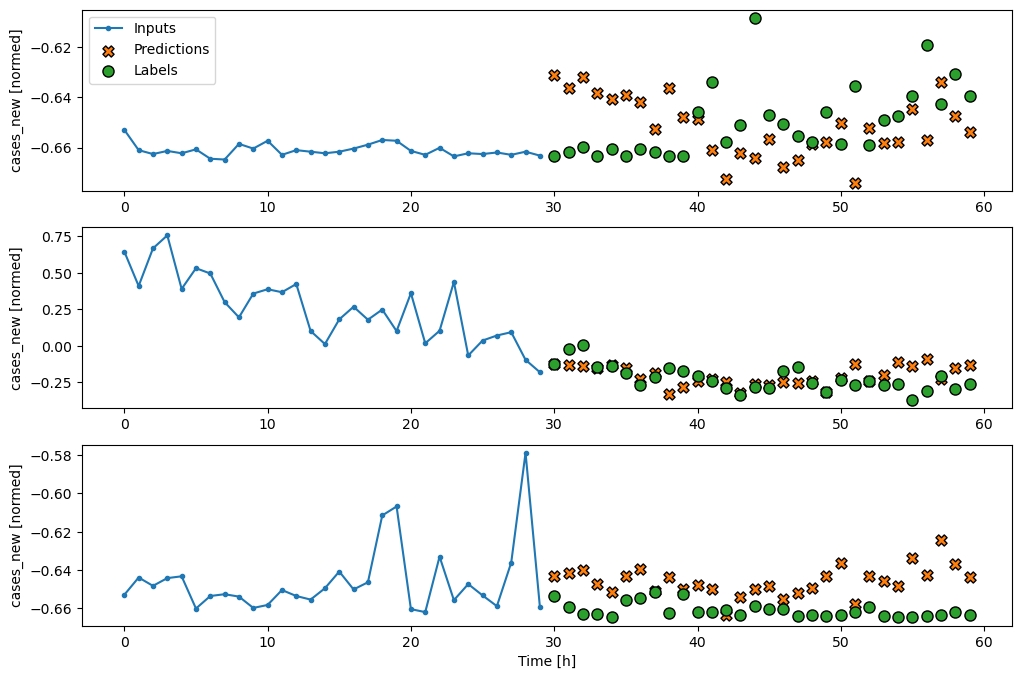

In [26]:
history = compile_and_fit(multi_lstm, multi_window, patience=3)
multi_window.plot(plot_col='cases_new', model=multi_lstm)

In [27]:
#Multi-step autoregressive model (only makes a single step pred and its output is fed back as its input to make the next pred)

#RNN(has feedback capability)

class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps, num_features):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

  def warmup(self, inputs):
    # inputs.shape => (batch, time, features)
    # x.shape => (batch, lstm_units)
    x, *state = self.lstm_rnn(inputs)

    # predictions.shape => (batch, features)
    prediction = self.dense(x)
    return prediction, state

  def call(self, inputs, training=None):
    # Use a TensorArray to capture dynamically unrolled outputs.
    predictions = []
    # Initialize the LSTM state.
    prediction, state = self.warmup(inputs)

    # Insert the first prediction.
    predictions.append(prediction)

    # Run the rest of the prediction steps.
    for n in range(1, self.out_steps):
        # Use the last prediction as input.
        x = prediction
        # Execute one lstm step.
        x, state = self.lstm_cell(x, states=state,
                                training=training)
        # Convert the lstm output to a prediction.
        prediction = self.dense(x)
        # Add the prediction to the output.
        predictions.append(prediction)

    # predictions.shape => (time, batch, features)
    predictions = tf.stack(predictions)
    # predictions.shape => (batch, time, features)
    predictions = tf.transpose(predictions, [1, 0, 2])
    return predictions

In [28]:
feedback_model = FeedBack(32, OUT_WINDOW, example_labels.shape[-1])

history = compile_and_fit(feedback_model, multi_window,patience=3)

Epoch 1/100
15/15 [==============================] - 14s 205ms/step - loss: 0.7630 - mean_absolute_error: 0.6615 - mean_absolute_percentage_error: 143.2558 - val_loss: 18.5667 - val_mean_absolute_error: 3.3505 - val_mean_absolute_percentage_error: 94.3269
Epoch 2/100
15/15 [==============================] - 1s 64ms/step - loss: 0.5819 - mean_absolute_error: 0.5284 - mean_absolute_percentage_error: 300.5110 - val_loss: 16.6938 - val_mean_absolute_error: 3.0600 - val_mean_absolute_percentage_error: 81.2134
Epoch 3/100
15/15 [==============================] - 1s 59ms/step - loss: 0.4092 - mean_absolute_error: 0.4133 - mean_absolute_percentage_error: 294.4092 - val_loss: 15.0632 - val_mean_absolute_error: 2.8163 - val_mean_absolute_percentage_error: 71.7514
Epoch 4/100
15/15 [==============================] - 1s 65ms/step - loss: 0.2835 - mean_absolute_error: 0.3228 - mean_absolute_percentage_error: 253.9754 - val_loss: 13.2783 - val_mean_absolute_error: 2.4987 - val_mean_absolute_percenta

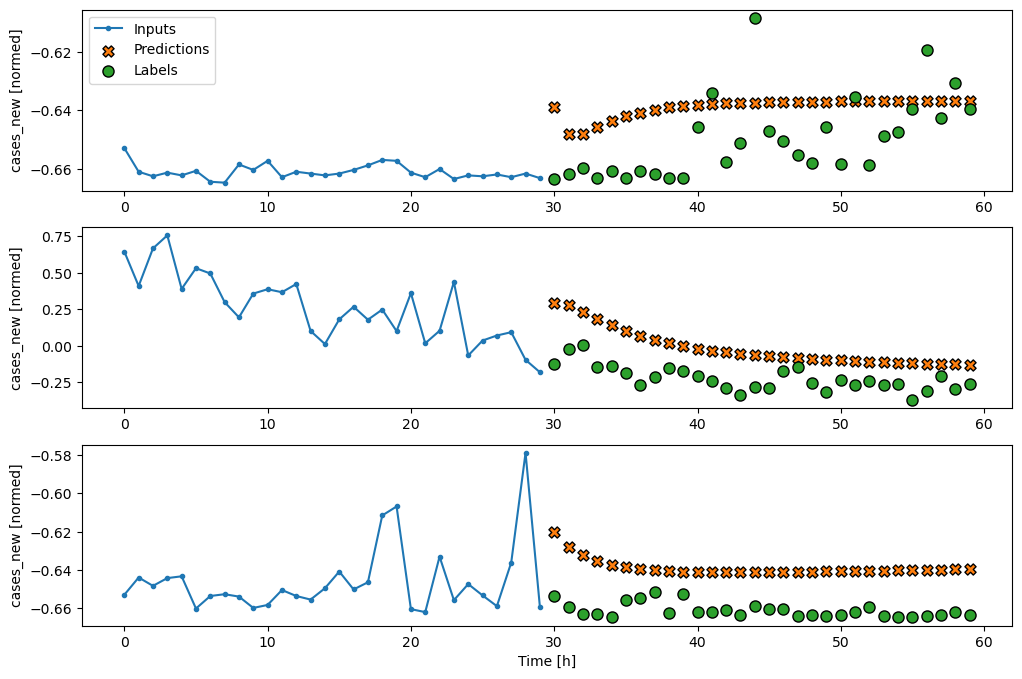

In [29]:
multi_window.plot(plot_col='cases_new', model=feedback_model)

In [40]:
#1.Importing
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from time_series_helper import WindowGenerator



mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [41]:
#2.Data Loading
csv_path = os.path.join(os.getcwd(),'cases_malaysia_covid.csv')
df = pd.read_csv(csv_path)

In [42]:
#3. Data Inspection
print("Shape of the date =", df.shape)
print("\nInfo about the dataframe =\n", df.info())
print("\nDesc of the dataframe =\n", df.describe().transpose())
print("\nExample data =\n", df.head(1))

Shape of the date = (780, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     780 non-null    object 
 1   cases_new                779 non-null    object 
 2   cases_import             780 non-null    int64  
 3   cases_recovered          780 non-null    int64  
 4   cases_active             780 non-null    int64  
 5   cases_cluster            780 non-null    int64  
 6   cases_unvax              780 non-null    int64  
 7   cases_pvax               780 non-null    int64  
 8   cases_fvax               780 non-null    int64  
 9   cases_boost              780 non-null    int64  
 10  cases_child              780 non-null    int64  
 11  cases_adolescent         780 non-null    int64  
 12  cases_adult              780 non-null    int64  
 13  cases_elderly            780 non-null    int64  
 

In [43]:
#4. Data Cleaning
print(df.isna().sum())
print(df.duplicated().sum())

# Convert the 'date' column to a datetime format
df['date'] = pd.to_datetime(df['date'])

# Covert cases_new to numeric
df['cases_new'] = pd.to_numeric(df['cases_new'], errors='coerce')

date                         0
cases_new                    1
cases_import                 0
cases_recovered              0
cases_active                 0
cases_cluster                0
cases_unvax                  0
cases_pvax                   0
cases_fvax                   0
cases_boost                  0
cases_child                  0
cases_adolescent             0
cases_adult                  0
cases_elderly                0
cases_0_4                    0
cases_5_11                   0
cases_12_17                  0
cases_18_29                  0
cases_30_39                  0
cases_40_49                  0
cases_50_59                  0
cases_60_69                  0
cases_70_79                  0
cases_80                     0
cluster_import             342
cluster_religious          342
cluster_community          342
cluster_highRisk           342
cluster_education          342
cluster_detentionCentre    342
cluster_workplace          342
dtype: int64
0


<ipython-input-43-9bd75be5bab7>:7: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'])


In [44]:
columns_needed= ['date','cases_new', 'cases_import', 'cases_recovered', 'cases_active']
df = df[columns_needed]

In [45]:
# Dealing with missing values
#filter out missing values
df[df.isnull().any(axis=1)]

,date,cases_new,cases_import,cases_recovered,cases_active
98,2020-05-02,NaN,11,116,1747
217,2020-08-29,NaN,10,8,153
273,2020-10-24,NaN,11,671,8953
279,2020-10-30,NaN,0,491,10380
287,2020-11-07,NaN,0,1029,11646
427,2021-03-27,NaN,5,1257,14127
445,2021-04-14,NaN,6,1485,16625
446,2021-04-15,NaN,19,1259,17510
476,2021-05-15,NaN,9,3432,41914
587,2021-09-03,NaN,14,22399,254719


In [46]:
#drop row with null values
df = df.dropna()

# Print the updated DataFrame
print(df)

          date  cases_new  cases_import  cases_recovered  cases_active
0   2020-01-25        4.0             4                0             4
1   2020-01-26        0.0             0                0             4
2   2020-01-27        0.0             0                0             4
3   2020-01-28        0.0             0                0             4
4   2020-01-29        3.0             3                0             7
..         ...        ...           ...              ...           ...
775 2022-03-10    30787.0           608            26457        314211
776 2022-03-11    32800.0           541            24444        322507
777 2022-03-12    26250.0           545            25089        323618
778 2022-03-13    22535.0           361            25356        320785
779 2022-03-14    22030.0           394            33872        308943

[767 rows x 5 columns]


In [47]:
#5. Feature Engineering
# Adding lag features to the dataset to improve training model
def add_lag_features(df, lag_steps):
    for i in range(1, lag_steps + 1):
        df[f'lag_{i}'] = df['cases_new'].shift(i)
    return df.dropna()

lag_steps = 30  # Experiment with different lag values
df = add_lag_features(df, lag_steps)

In [48]:
# Remove the date column from the dataframe and paste it in a seperate variable
date_time = pd.to_datetime(df.pop('date'))

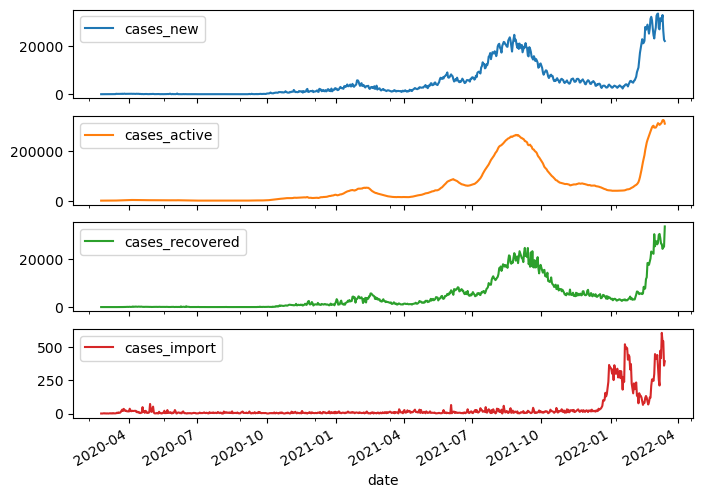

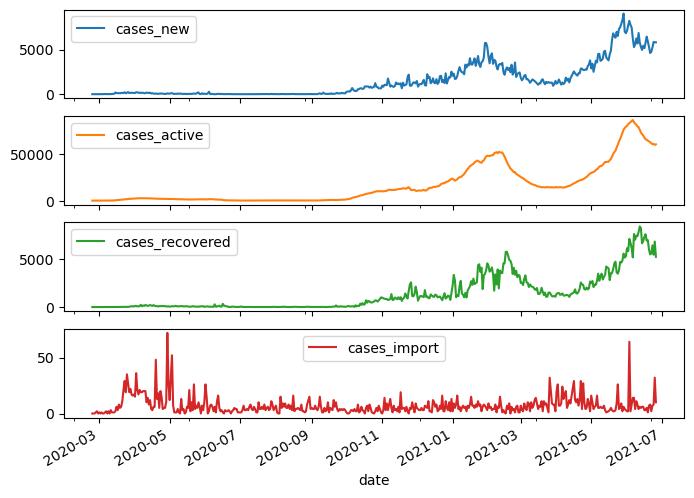

In [49]:
#plotting graphs to inspect any trends
plot_cols = ['cases_new', 'cases_active', 'cases_recovered', 'cases_import']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

# Plotting the first 480 rows of data
plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

In [50]:
#Inspect some basic stat from the dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cases_new,737.0,5142.712347,7207.538888,0.0,118.0,2451.0,5854.0,33406.0
cases_import,737.0,38.278155,93.378743,0.0,4.0,7.0,18.0,608.0
cases_recovered,737.0,4674.530529,6539.765149,0.0,87.0,2276.0,5579.0,33872.0
cases_active,737.0,57568.947083,78765.311375,1.0,1758.0,25319.0,66993.0,323618.0
lag_1,737.0,5112.820896,7183.048289,0.0,117.0,2437.0,5841.0,33406.0
lag_2,737.0,5082.244233,7156.700080,0.0,115.0,2433.0,5828.0,33406.0
lag_3,737.0,5046.626866,7116.416494,0.0,110.0,2364.0,5812.0,33406.0
lag_4,737.0,5002.122117,7044.818611,0.0,110.0,2342.0,5809.0,33406.0
lag_5,737.0,4960.348711,6982.719801,0.0,110.0,2341.0,5806.0,33406.0
lag_6,737.0,4919.309362,6922.529796,0.0,109.0,2340.0,5803.0,33406.0


In [51]:
#6. Data splitting
#Note: We don't want to shuffle the data when splitting to ensure the data is still in correct order based on time steps

column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [52]:
#7. Data normalization
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

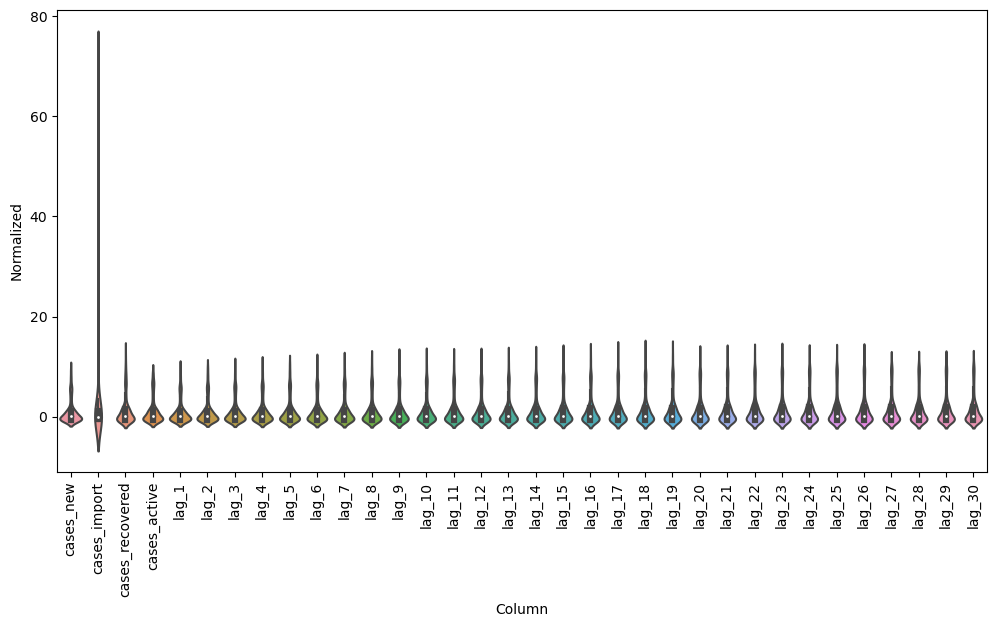

In [53]:
#8.Inspect dist of the features after normalization
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [54]:
w1 = WindowGenerator(input_width=30, label_width=30,shift=1, train_df=train_df, val_df=val_df, test_df=test_df, label_columns=['cases_new'])

w2 = WindowGenerator(input_width=30, label_width=30,shift=30,train_df=train_df, val_df=val_df, test_df=test_df, label_columns=['cases_new'])

In [55]:
#Stack three slices, the length of the total window for w1 and w2.
example_window_w1 = tf.stack([np.array(train_df[:w1.total_window_size]),
                             np.array(train_df[100:100+w1.total_window_size]),
                             np.array(train_df[200:200+w1.total_window_size])])

example_window_w2 = tf.stack([np.array(train_df[:w2.total_window_size]),
                             np.array(train_df[100:100+w2.total_window_size]),
                             np.array(train_df[200:200+w2.total_window_size])])

example_inputs_w1, example_labels_w1 = w1.split_window(example_window_w1)
example_inputs_w2, example_labels_w2 = w2.split_window(example_window_w2)

print('All shapes are: (batch, time, features)')
print(f'Window shape w1: {example_window_w1.shape}')
print(f'Inputs shape w1: {example_inputs_w1.shape}')
print(f'Labels shape w1: {example_labels_w1.shape}')
print(f'Window shape w2: {example_window_w2.shape}')
print(f'Inputs shape w2: {example_inputs_w2.shape}')
print(f'Labels shape w2: {example_labels_w2.shape}')

All shapes are: (batch, time, features)
Window shape w1: (3, 31, 34)
Inputs shape w1: (3, 30, 34)
Labels shape w1: (3, 30, 1)
Window shape w2: (3, 60, 34)
Inputs shape w2: (3, 30, 34)
Labels shape w2: (3, 30, 1)


(TensorSpec(shape=(None, 30, 34), dtype=tf.float32, name=None), TensorSpec(shape=(None, 30, 1), dtype=tf.float32, name=None))
(TensorSpec(shape=(None, 30, 34), dtype=tf.float32, name=None), TensorSpec(shape=(None, 30, 1), dtype=tf.float32, name=None))


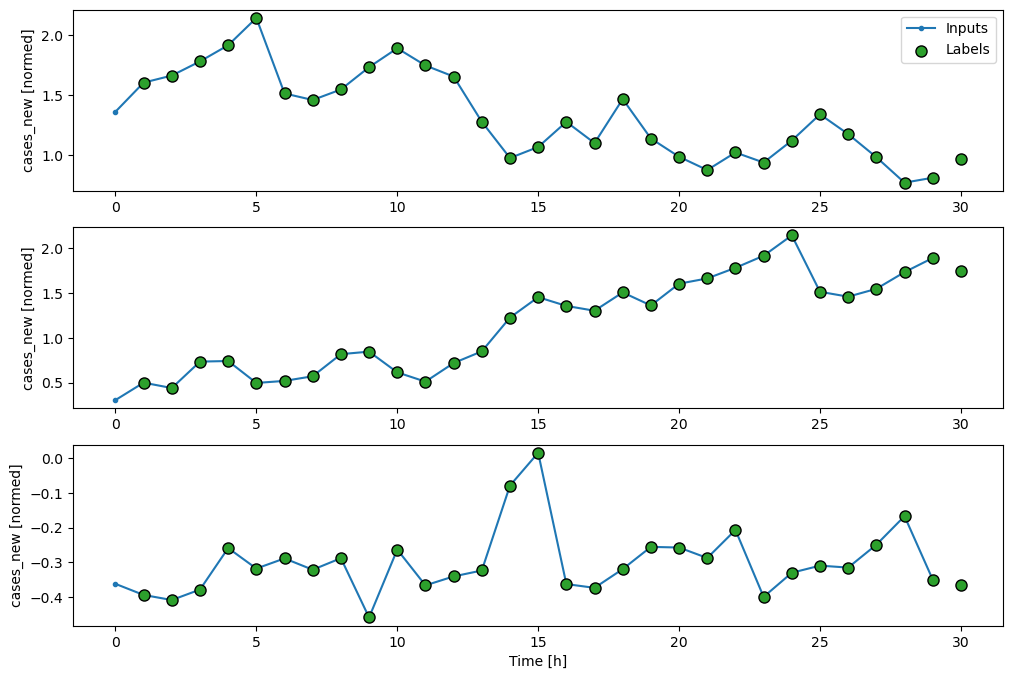

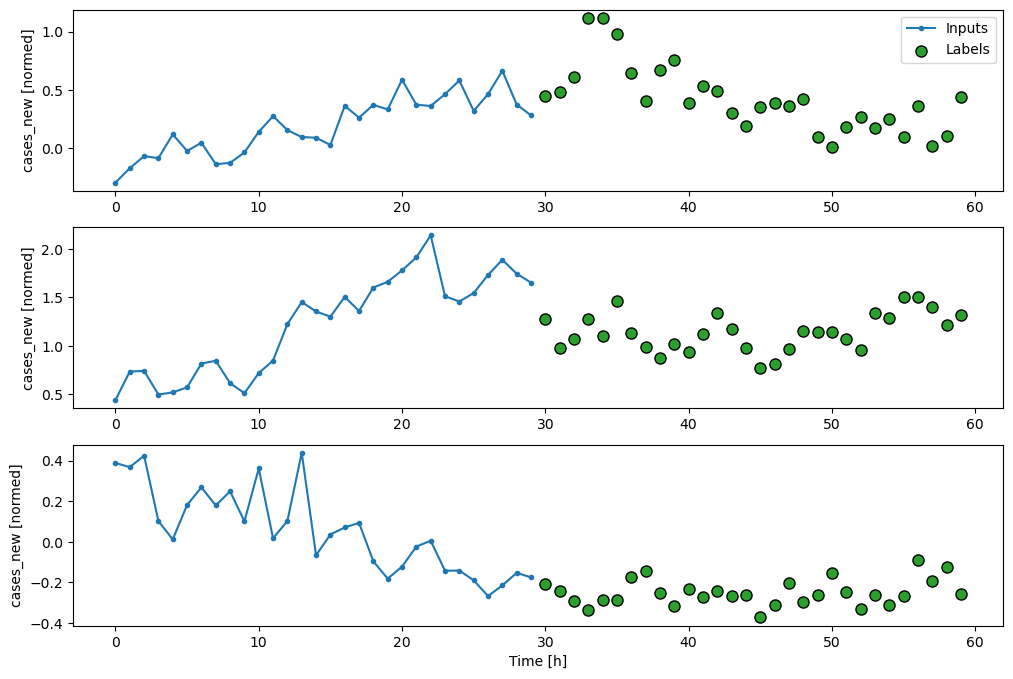

In [56]:
# Plot both w1 and w2
w1.plot(plot_col='cases_new')
w2.plot(plot_col='cases_new')

# Each element is an (inputs, label) pair for both w1 and w2.
print(w1.train.element_spec)
print(w2.train.element_spec)

In [57]:
#9. Model developmennt
#Create the data window
wide_window = WindowGenerator(
    input_width=30, label_width=30, shift=1,train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['cases_new'])

wide_window

Total window size: 31
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
Label column name(s): ['cases_new']

In [58]:
#single-step LSTM model
#predict only a single future point
from tensorflow import keras
from tensorflow.keras import callbacks
from tensorflow.keras.regularizers import l2

l2_strength = 0.005  # Adjust this value to control the strength of L2 regularization

# Increase model complexity
lstm_model = tf.keras.Sequential()
lstm_model.add(tf.keras.layers.LSTM(128, activation='relu', return_sequences=True, kernel_regularizer=l2(l2_strength)))
lstm_model.add(tf.keras.layers.Dropout(0.5))
lstm_model.add(tf.keras.layers.LSTM(64, activation='relu', return_sequences=True, kernel_regularizer=l2(l2_strength)))
lstm_model.add(tf.keras.layers.Dropout(0.5))
lstm_model.add(tf.keras.layers.Dense(1, activation='linear'))

MAX_EPOCHS = 100  # Increase the number of training epochs

def compile_and_fit(model, window, patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

    model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=[tf.keras.metrics.MeanAbsoluteError(), tf.keras.metrics.MeanAbsolutePercentageError()])

    # Create TensorBoard callback
    base_log_path = r"tensorboard_logs\covid_model"
    log_path = os.path.join(base_log_path, datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    tb = callbacks.TensorBoard(log_path)

    history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping, tb])
    return history

history = compile_and_fit(lstm_model, wide_window, patience=15)

Epoch 1/100
16/16 [==============================] - 8s 169ms/step - loss: 1.3307 - mean_absolute_error: 0.3691 - mean_absolute_percentage_error: 106.6413 - val_loss: 4.4027 - val_mean_absolute_error: 1.3515 - val_mean_absolute_percentage_error: 74.1582
Epoch 2/100
16/16 [==============================] - 2s 100ms/step - loss: 0.9920 - mean_absolute_error: 0.2584 - mean_absolute_percentage_error: 85.3959 - val_loss: 4.8080 - val_mean_absolute_error: 1.4662 - val_mean_absolute_percentage_error: 77.9031
Epoch 3/100
16/16 [==============================] - 2s 95ms/step - loss: 0.7797 - mean_absolute_error: 0.2226 - mean_absolute_percentage_error: 74.9025 - val_loss: 11.1729 - val_mean_absolute_error: 2.2318 - val_mean_absolute_percentage_error: 107.5457
Epoch 4/100
16/16 [==============================] - 1s 85ms/step - loss: 0.6281 - mean_absolute_error: 0.2048 - mean_absolute_percentage_error: 72.6309 - val_loss: 4.6790 - val_mean_absolute_error: 1.4800 - val_mean_absolute_percentage_er

53.30037307739258


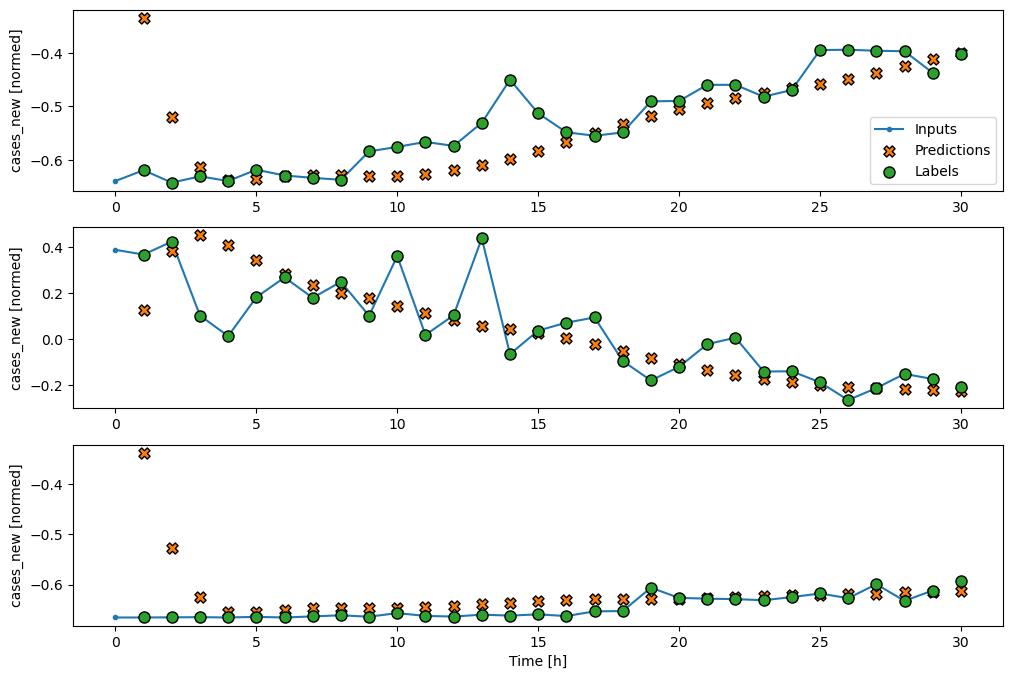

In [59]:
wide_window.plot(plot_col='cases_new', model=lstm_model)

#MAPE
mape = history.history['mean_absolute_percentage_error']
final_mape = mape[-1]
print(final_mape)

In [60]:
#multi-output for single step model
wide_window = WindowGenerator(input_width=30, label_width=30, shift=1, train_df=train_df, val_df=val_df, test_df=test_df)

for example_inputs, example_labels in wide_window.train.take(1):
    print(f'Inputs shape (batch, time, feature):{example_inputs.shape}')
    print(f'Labels shape (batch, time, feature):{example_labels.shape}')

Inputs shape (batch, time, feature):(32, 30, 34)
Labels shape (batch, time, feature):(32, 30, 34)


In [61]:
# to have multiple output, the # nodes inside output layer = the # columns u have for your labels
lstm_model_2 = keras.Sequential()
lstm_model_2.add(keras.layers.LSTM(128, return_sequences=True))
lstm_model_2.add(keras.layers.Dense(example_labels.shape[-1]))

history = compile_and_fit(lstm_model_2, wide_window, patience=15)

Epoch 1/100
16/16 [==============================] - 6s 123ms/step - loss: 0.4521 - mean_absolute_error: 0.4497 - mean_absolute_percentage_error: 160.4693 - val_loss: 17.3270 - val_mean_absolute_error: 3.1131 - val_mean_absolute_percentage_error: 59.3734
Epoch 2/100
16/16 [==============================] - 1s 56ms/step - loss: 0.1301 - mean_absolute_error: 0.2147 - mean_absolute_percentage_error: 227.7799 - val_loss: 13.0390 - val_mean_absolute_error: 2.6074 - val_mean_absolute_percentage_error: 50.8031
Epoch 3/100
16/16 [==============================] - 1s 51ms/step - loss: 0.0795 - mean_absolute_error: 0.1609 - mean_absolute_percentage_error: 173.7366 - val_loss: 11.4362 - val_mean_absolute_error: 2.4139 - val_mean_absolute_percentage_error: 45.8319
Epoch 4/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0634 - mean_absolute_error: 0.1361 - mean_absolute_percentage_error: 157.7917 - val_loss: 10.5373 - val_mean_absolute_error: 2.2996 - val_mean_absolute_percentag

86.77946472167969


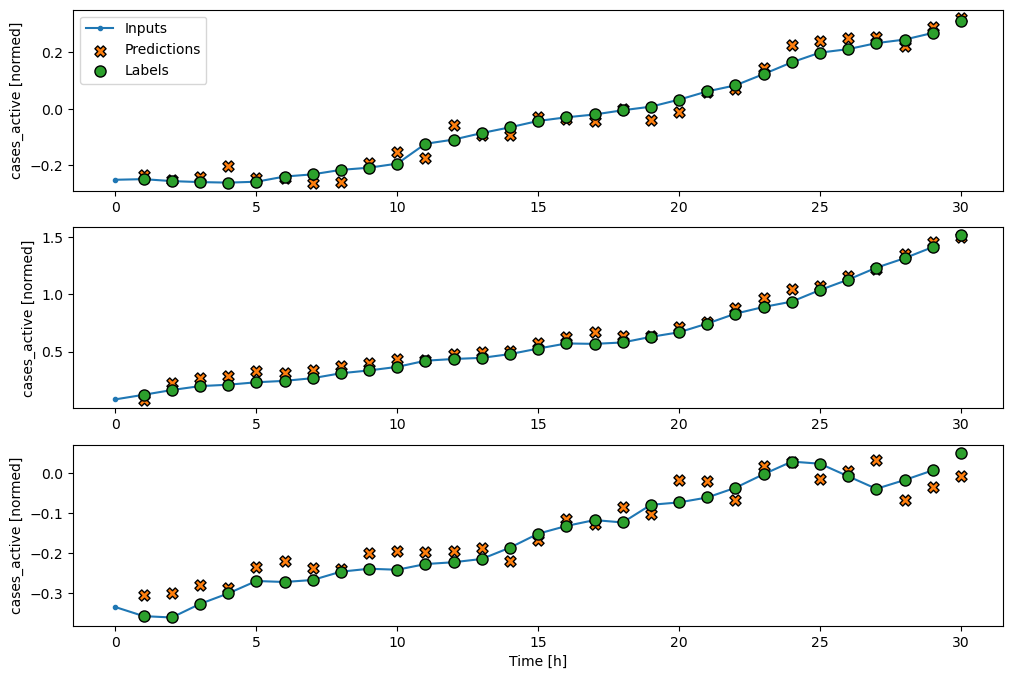

In [62]:
#10. Save the best Model
wide_window.plot(plot_col='cases_active', model=lstm_model_2)

mape = history.history['mean_absolute_percentage_error']
final_mape = mape[-1]
print(final_mape)

In [63]:
lstm_model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 30, 128)           83456     
                                                                 
 dense_5 (Dense)             (None, 30, 34)            4386      
                                                                 
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 30, 128)           83456     
                                                                 
 dense_5 (Dense)             (None, 30, 34)            4386      
                                                                 
Total params: 87842 (343.13 KB)
Trainable params: 87842 (343.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [64]:
lstm_model_2.save(os.path.join('models', 'assesment2_model.h5'))

c:\Users\ThinkPad\anaconda3\envs\tensorflow\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


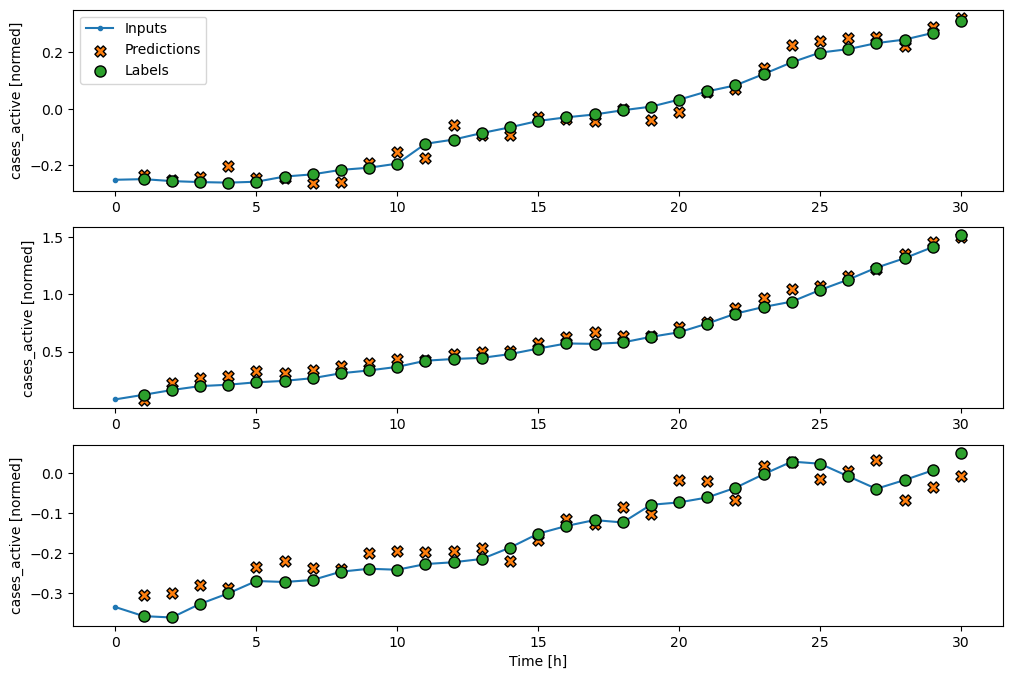

In [65]:
#10. Save the best Model
wide_window.plot(plot_col='cases_active', model=lstm_model_2)

In [66]:
mape = history.history['mean_absolute_percentage_error']
final_mape = mape[-1]
print(final_mape)

86.77946472167969


In [67]:
lstm_model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 30, 128)           83456     
                                                                 
 dense_5 (Dense)             (None, 30, 34)            4386      
                                                                 
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 30, 128)           83456     
                                                                 
 dense_5 (Dense)             (None, 30, 34)            4386      
                                                                 
Total params: 87842 (343.13 KB)
Trainable params: 87842 (343.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [68]:
lstm_model_2.save(os.path.join('models', 'assesment2_model.h5'))

In [69]:
lstm_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 30, 128)           83456     
                                                                 
 dropout_2 (Dropout)         (None, 30, 128)           0         
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 30, 128)           83456     
                                                                 
 dropout_2 (Dropout)         (None, 30, 128)           0         
                                                                 
 lstm_5 (LSTM)               (None, 30, 64)            49408     
                                                                 
 dropout_3 (Dropout)         (None, 30, 64)            0         
                                                      

In [70]:
lstm_model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 30, 128)           83456     
                                                                 
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 30, 128)           83456     
                                                                 
 dense_5 (Dense)             (None, 30, 34)            4386      
                                                                 
Total params: 87842 (343.13 KB)
Trainable params: 87842 (343.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [71]:
lstm_model.summary()
lstm_model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 30, 128)           83456     
                                                                 
 dropout_2 (Dropout)         (None, 30, 128)           0         
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 30, 128)           83456     
                                                                 
 dropout_2 (Dropout)         (None, 30, 128)           0         
                                                                 
 lstm_5 (LSTM)               (None, 30, 64)            49408     
                                                                 
 dropout_3 (Dropout)         (None, 30, 64)            0         
                                                      

In [72]:
multi_lstm.summary()
feedback_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 32)                8576      
                                                                 
 dense_2 (Dense)             (None, 1020)              33660     
                                                                 
 reshape (Reshape)           (None, 30, 34)            0         
                                                                 
Total params: 42236 (164.98 KB)
Trainable params: 42236 (164.98 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "feed_back"
_________________________________________________________________
 Layer (type)                Output Shape              Param # 